# Data Processing 

In [1]:
import numpy as np
import pandas as pd
import wget

In [4]:
data='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [5]:
wget.download(data, 'D:\Applied Data Science & AI\Python Programming')

100% [..........................................................................] 1475504 / 1475504

'D:\\Applied Data Science & AI\\Python Programming/data (1).csv'

In [2]:
df=pd.read_csv('D:\Applied Data Science & AI\data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [4]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [5]:
string=list(df.dtypes[df.dtypes=='object'].index)

In [6]:
for col in string:
    df[col]=df[col].str.lower().str.replace(' ','_')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

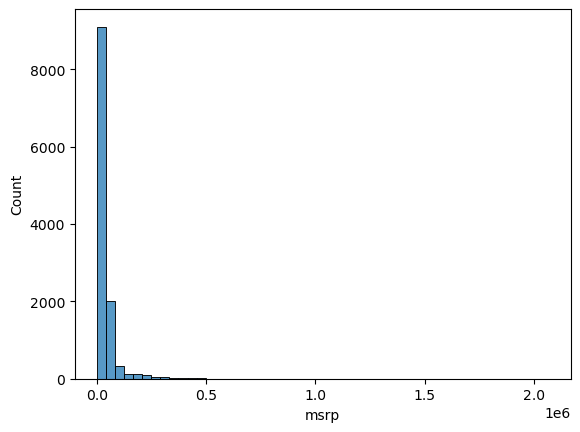

In [11]:
sns.histplot(df['msrp'],bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

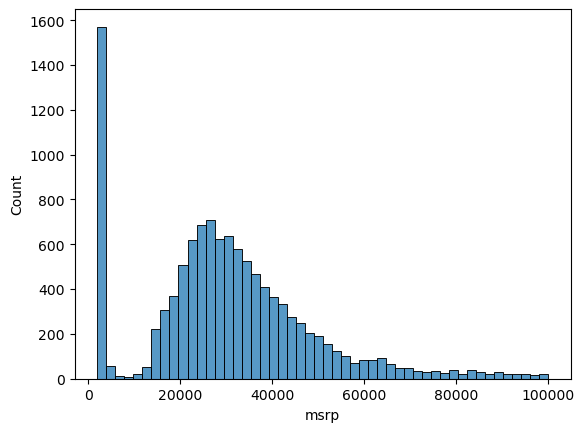

In [12]:
sns.histplot(df.msrp[df.msrp < 100000],bins=50)

In [13]:
np.log1p([0,1,10,1000,100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [14]:
price_logs=np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

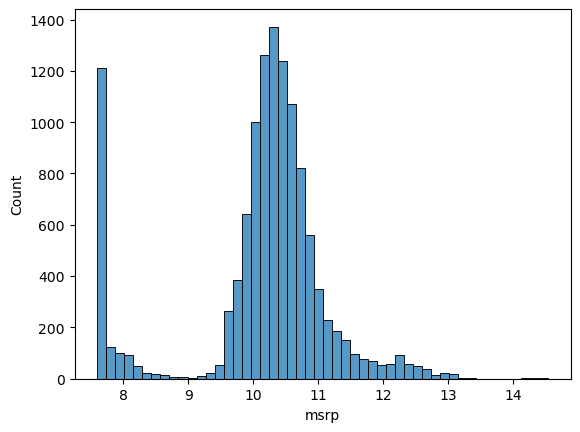

In [15]:
sns.histplot(price_logs,bins=50)

In [16]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Train Validation and Test Set

In [17]:
n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n - n_val - n_test

In [18]:
n,n_val+n_test+n_train

(11914, 11914)

In [19]:
n_val,n_test,n_train

(2382, 2382, 7150)

In [20]:
df_val= df.iloc[:n_val]
df_test=df.iloc[n_val:n_val+n_test]
df_train=df.iloc[n_val+n_test:]

In [21]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4764,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,37800
4765,ford,flex,2017,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,43030
4766,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,wagon,22,16,5657,40180
4767,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,32730
4768,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,38230


In [22]:
idx=np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [23]:
df_train= df.iloc[idx[:n_train]]
df_val=df.iloc[idx[n_train:n_train+n_val]]
df_test=df.iloc[idx[n_train+n_val:]]

In [24]:
len(df_train),len(df_val),len(df_test)

(7150, 2382, 2382)

In [25]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [26]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [27]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [28]:
y_train=np.log1p(df_train.msrp.values)
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)

In [29]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [30]:
len(y_train)

7150

# Regression 

In [31]:
xi= [453,11,86]
xi=np.array(xi)

In [32]:
wo=7.17
w=[0.01,0.04,0.002]

In [33]:
def linear_reg(xi):
    prd=wo
    n=len(xi)
    for i in range(n):
        prd=prd+w[i]*xi[i]
    return prd

In [34]:
linear_reg(xi)

12.312

In [35]:
np.expm1(12.312)

222347.2221101062

In [36]:
w_new=[wo]+w

In [37]:
def linear_regression(xi):
    xi= np.insert(xi,0,1)
    return xi.dot(w_new)

In [38]:
linear_regression(xi)

12.312000000000001

In [39]:

x1=[1,148,24,1345]
x5=[1,238,54,1645]
x15=[1,453,11,86]
X=[x1,x5,x15]
X=np.array(X)
X

array([[   1,  148,   24, 1345],
       [   1,  238,   54, 1645],
       [   1,  453,   11,   86]])

In [40]:
def linear_regression(xi):
    return xi.dot(w_new)

In [41]:
pred=linear_regression(X)
pred

array([12.3  , 15.   , 12.312])

In [42]:
np.expm1(pred)

array([ 219694.98867214, 3269016.37247211,  222347.22211011])

# Training Model

In [43]:
X

array([[   1,  148,   24, 1345],
       [   1,  238,   54, 1645],
       [   1,  453,   11,   86]])

In [44]:
X=[
[148,24,1385],
[132,25,2031],
[453,11,86] ,
[158,24,185],
[172,25,201],
[413,11,86],
[38,54,185],
[142,25,431],
[453,31,86],
]
X=np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [45]:
ones=np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [46]:
y=[100,200,150,250,100,200,150,250,120]

In [47]:
X=np.column_stack([ones,X])
list(X)

[array([1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03]),
 array([1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03]),
 array([  1., 453.,  11.,  86.]),
 array([  1., 158.,  24., 185.]),
 array([  1., 172.,  25., 201.]),
 array([  1., 413.,  11.,  86.]),
 array([  1.,  38.,  54., 185.]),
 array([  1., 142.,  25., 431.]),
 array([  1., 453.,  31.,  86.])]

In [48]:
XTX=X.T.dot(X)

In [49]:
XTX_inv=np.linalg.inv(XTX)

In [50]:
W=XTX_inv.dot(X.T).dot(y)

In [51]:
w0=W[0]
w_full=W[1:]
w0,w_full

(300.06776692555593, array([-0.22774253, -2.5769413 , -0.02301206]))

In [52]:
def Train_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    W=XTX_inv.dot(X.T).dot(y)
    w0=W[0]
    w_full=W[1:]
    
    return w0,w_full

In [53]:
X=[
[148,24,1385],
[132,25,2031],
[453,11,86] ,
[158,24,185],
[172,25,201],
[413,11,86],
[38,54,185],
[142,25,431],
[453,31,86],
]
X=np.array(X)

In [54]:
Train_regression(X,y)

(300.06776692555593, array([-0.22774253, -2.5769413 , -0.02301206]))

# BaseLine Model For predicting Car price

## Using above custome function(Linear Regression)

In [55]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [56]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [57]:
base=['engine_hp','engine_cylinders','highway_mpg','city_mpg', 'popularity']
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [58]:
X_train=df_train[base].values

In [59]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [60]:
#df_train[base].isnull().sum()
X_train=df_train[base].fillna(0)

In [61]:
w0,w=Train_regression(X_train,y_train)

In [62]:
y_pred= w0+X_train.dot(w)

In [63]:
def linear_regression(xi,w,w0):
    return w0+xi.dot(w)

In [64]:
linear_regression(X_train,w,w0)

0        9.547928
1        9.387340
2        9.671978
3        8.654388
4       10.866020
          ...    
7145    10.593528
7146    10.111199
7147    10.304230
7148    11.977891
7149     9.998631
Length: 7150, dtype: float64

<Axes: ylabel='Count'>

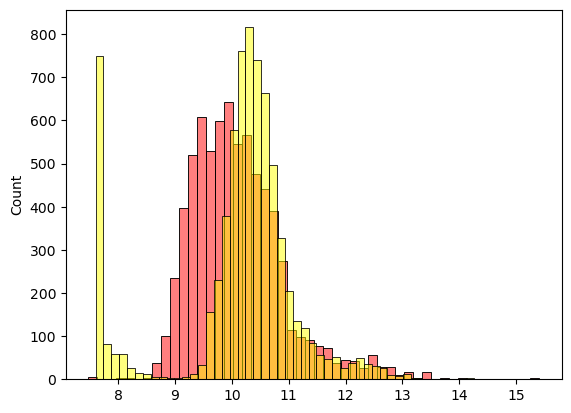

In [65]:
sns.histplot(y_pred,color='red',alpha=0.5,bins=50)
sns.histplot(y_train,color='yellow',alpha=0.5,bins=50)

# RMSE (Root Mean Square Error)

In [66]:
def RMSE(y,y_pred):
    E=y-y_pred
    SE=E**2
    MSE=SE.mean()
    RMSE=np.sqrt(MSE)
    return RMSE

In [67]:
RMSE(y_train,y_pred)

0.7554192603920132

# Validation Model

In [68]:
base=['engine_hp','engine_cylinders','highway_mpg','city_mpg', 'popularity']
def prep_X(df):
    df_num=df[base]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [74]:
X_train=prep_X(df_train)
w0,w=Train_regression(X_train,y_train)

X_val=prep_X(df_val)
y_pred=linear_regression(X_val,w,w0)

RMSE(y_val,y_pred)

0.7616530991301594

## Features Engineering

In [69]:
df_train.year.max()

2017

In [70]:
2017-df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [71]:
base=['engine_hp','engine_cylinders','highway_mpg','city_mpg', 'popularity']
def prep_X(df):
    df=df.copy()
    
    df['age']=2017-df['year']
    features= ['age']+base
    df_num=df[features]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [72]:
X_train=prep_X(df_train)

In [73]:
X_train

array([[9.000e+00, 1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03],
       [5.000e+00, 1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03],
       [1.000e+00, 1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02],
       ...,
       [2.000e+00, 2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02],
       [3.000e+00, 5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01],
       [0.000e+00, 2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02]])

In [74]:
w0,w=Train_regression(X_train,y_train)

X_val=prep_X(df_val)
y_pred=linear_regression(X_val,w,w0)

RMSE(y_val,y_pred)

0.5172055461058327

<Axes: ylabel='Count'>

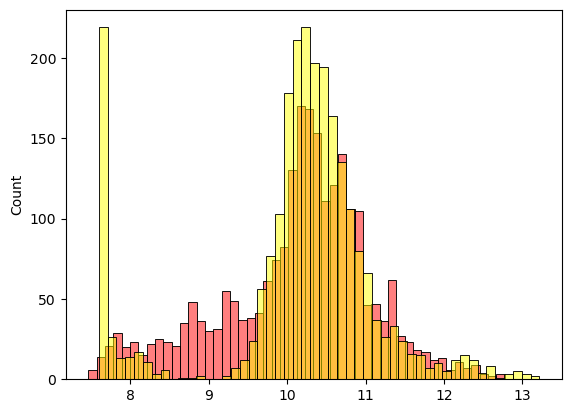

In [75]:
sns.histplot(y_pred,color='red',alpha=0.5,bins=50)
sns.histplot(y_val,color='yellow',alpha=0.5,bins=50)

## Categorical variables

In [76]:
base=['engine_hp','engine_cylinders','highway_mpg','city_mpg', 'popularity']
def prep_X(df):
    df=df.copy()
    features=base.copy()
    
    df['age']=2017-df['year']
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v]= (df.number_of_doors==v).astype('int')
        features.append('num_doors_%s' % v)
        
    df_num=df[features]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [77]:
X_train=prep_X(df_train)
X_train
w0,w=Train_regression(X_train,y_train)
X_val=prep_X(df_val)
y_pred=linear_regression(X_val,w,w0)
RMSE(y_val,y_pred)

0.5157995641503085

In [78]:
makes=list(df.make.value_counts().head().index)

In [79]:
base=['engine_hp','engine_cylinders','highway_mpg','city_mpg', 'popularity']
def prep_X(df):
    df=df.copy()
    features=base.copy()
    
    df['age']=2017-df['year']
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v]= (df.number_of_doors==v).astype('int')
        features.append('num_doors_%s' % v)
        
    for v in makes:
        df['make_%s' % v]= (df.make==v).astype('int')
        features.append('make_%s' % v)   
        
    df_num=df[features]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [80]:
X_train=prep_X(df_train)
X_train
w0,w=Train_regression(X_train,y_train)
X_val=prep_X(df_val)
y_pred=linear_regression(X_val,w,w0)
RMSE(y_val,y_pred)

0.5076038849555671

In [81]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [82]:
categorical=[
    'make','engine_fuel_type','transmission_type','driven_wheels',
    'market_category','vehicle_size','vehicle_style'
]

In [83]:
catog={}

for c in categorical:
    catog[c]=list(df[c].value_counts().head().index)


In [84]:
# Prep function including categorical varibles 
# final Format
base=['engine_hp','engine_cylinders','highway_mpg','city_mpg', 'popularity']
def prep_X(df):
    df=df.copy()
    features=base.copy()
    
    df['age']=2017-df['year']
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v]= (df.number_of_doors==v).astype('int')
        features.append('num_doors_%s' % v)
        
    for c, values in catog.items():
        for v in values:
            df['%s_%s' % (c,v)]= (df[c]==v).astype('int')
            features.append('%s_%s' % (c,v))  
        
    df_num=df[features]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

In [85]:
X_train=prep_X(df_train)
X_train
w0,w=Train_regression(X_train,y_train)
X_val=prep_X(df_val)
y_pred=linear_regression(X_val,w,w0)
RMSE(y_val,y_pred)

52.08765237410741

In [86]:
X_train[0]

array([1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00])

# Regularization

In [167]:
def Train_regression_reg(X,y,r=0.001):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX=XTX + r * np.eye(XTX.shape[0])
    XTX_inv=np.linalg.inv(XTX)
    W=XTX_inv.dot(X.T).dot(y)
    w0=W[0]
    w_full=W[1:]
    
    return w0,w_full

In [171]:
X_train=prep_X(df_train)
X_train
w0,w=Train_regression_reg(X_train,y_train,r=0.01)
X_val=prep_X(df_val)
y_pred=linear_regression(X_val,w,w0)
RMSE(y_val,y_pred)

0.4565175086094597

# Tuning Model

In [174]:
for reg in [0,0.00001,0.0001,0.001,0.01,0.1,1,10]:
    X_train=prep_X(df_train)
    X_train
    w0,w=Train_regression_reg(X_train,y_train,r=reg)
    X_val=prep_X(df_val)
    y_pred=linear_regression(X_val,w,w0)
    score=RMSE(y_val,y_pred)
    print(reg,score)

0 52.08765237410741
1e-05 0.45651702775634717
0.0001 0.45651706457624014
0.001 0.4565175086094597
0.01 0.456521990118657
0.1 0.4565692763037788
1 0.45722043179960414
10 0.4701456932100265


In [175]:
reg=0.001
X_train=prep_X(df_train)
X_train
w0,w=Train_regression_reg(X_train,y_train,r=reg)
X_val=prep_X(df_val)
y_pred=linear_regression(X_val,w,w0)
RMSE(y_val,y_pred)

0.4565175086094597

# Using Model on Test Data

In [176]:
df_full_train = pd.concat([df_train,df_val])

In [179]:
df_full_train=df_full_train.reset_index(drop=True)

In [182]:
y_full_train=np.concatenate([y_train,y_val])

In [189]:
X_full_train=prep_X(df_full_train)
w0,w=Train_regression_reg(X_full_train,y_full_train,r=reg)

In [190]:
X_test=prep_X(df_test)
y_pred=linear_regression(X_test,w,w0)

In [191]:
RMSE(y_test,y_pred)

0.4517749309383914

In [195]:
# pretending data comes from outside eg: website or app
# so it should be in dict format 
car=df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [197]:
# converting dict to data frame
df_small=pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [198]:
X_small=prep_X(df_small)

In [199]:
y_pred=linear_regression(X_small,w,w0)
y_pred

array([10.46265169])

In [201]:
np.expm1(y_pred[0])

34983.195872867545

In [204]:
np.expm1(y_test[20])

35000.00000000001